# Airbnb Berlin 

**Hangi Semt?:**

+ Yapılan kiralamaların kaçı, hangi semtte yapılmış?

**Hangi Oda Tipi?:**

+ Yapılan kiralamaların kaçı, hangi oda türünde yapılmış?

**Aylara Göre:**

+ Fiyat ortalamasının aylara göre değişimi

+ Oda tiplerinin fiyat ortalamasının aylara göre değişimi

+ Semtlerin fiyat ortalamasının aylara göre değişimi

**Yıllara Göre:**

+ Fiyat ortalamasının yıllara göre değişimi

+ Oda tiplerinin fiyat ortalamasının yıllara göre değişimi

+ Semtlerin fiyat ortalamasının yıllara göre değişimi

# Verileri İçe Aktarma, Kontrol Etme ve Birleştirme

In [1]:
import plotly.io as pio

pio.renderers
pio.renderers.default = "svg"

In [2]:
import pandas as pd 

berlin_listings = pd.read_csv("berlin_listings.csv")
berlin_reviews = pd.read_csv("berlin_reviews.csv")

In [3]:
berlin_listings.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,147,2021-01-01,0.88,1,303,0,First name and Last name: Nicolas Krotz Conta...
1,251423,2-room I 50 m² I Comfort I Balcony,1023063,Raja Jooseppi,Mitte,Brunnenstr. Nord,52.53867,13.39712,Entire home/apt,100,3,14,2023-01-29,0.11,8,93,10,01/Z/NA/003420-15
2,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.09,1,0,0,03/Z/RA/003410-18


In [4]:
berlin_reviews.head(3)

,listing_id,date
0,3176,2009-06-20
1,176355,2011-12-20
2,176355,2012-04-09


### Bu iki veri setini 'berlin' isimli yeni bir veri setinde birleştirelim

In [5]:
berlin = berlin_reviews.merge(berlin_listings, left_on = "listing_id", right_on = "id", how = "left")

In [6]:
berlin.head(3)

,listing_id,date,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,2009-06-20,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,147,2021-01-01,0.88,1,303,0,First name and Last name: Nicolas Krotz Conta...
1,176355,2011-12-20,176355,11A Landmark/Checkpoint Charlie/110m2/2BATH/2BR,843326,Nino,Friedrichshain-Kreuzberg,Südliche Friedrichstadt,52.50254,13.39134,Entire home/apt,291,3,62,2023-01-01,0.45,3,224,22,02/Z/NA/002625-16
2,176355,2012-04-09,176355,11A Landmark/Checkpoint Charlie/110m2/2BATH/2BR,843326,Nino,Friedrichshain-Kreuzberg,Südliche Friedrichstadt,52.50254,13.39134,Entire home/apt,291,3,62,2023-01-01,0.45,3,224,22,02/Z/NA/002625-16


### Oluşturduğumuz yeni veri setine "year" ve "month" isimli sütunları ekleyelim

In [7]:
berlin["date"] = pd.to_datetime(berlin["date"])
berlin["year"] = berlin["date"].dt.year
berlin["month"] = berlin["date"].dt.month
berlin["day"] = berlin["date"].dt.day

In [8]:
berlin.head(3)

,listing_id,date,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,month,day
0,3176,2009-06-20,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,...,147,2021-01-01,0.88,1,303,0,First name and Last name: Nicolas Krotz Conta...,2009,6,20
1,176355,2011-12-20,176355,11A Landmark/Checkpoint Charlie/110m2/2BATH/2BR,843326,Nino,Friedrichshain-Kreuzberg,Südliche Friedrichstadt,52.50254,13.39134,...,62,2023-01-01,0.45,3,224,22,02/Z/NA/002625-16,2011,12,20
2,176355,2012-04-09,176355,11A Landmark/Checkpoint Charlie/110m2/2BATH/2BR,843326,Nino,Friedrichshain-Kreuzberg,Südliche Friedrichstadt,52.50254,13.39134,...,62,2023-01-01,0.45,3,224,22,02/Z/NA/002625-16,2012,4,9


### Veri setimizin son halinde kayıp veri var mı yok mu göz atalım.

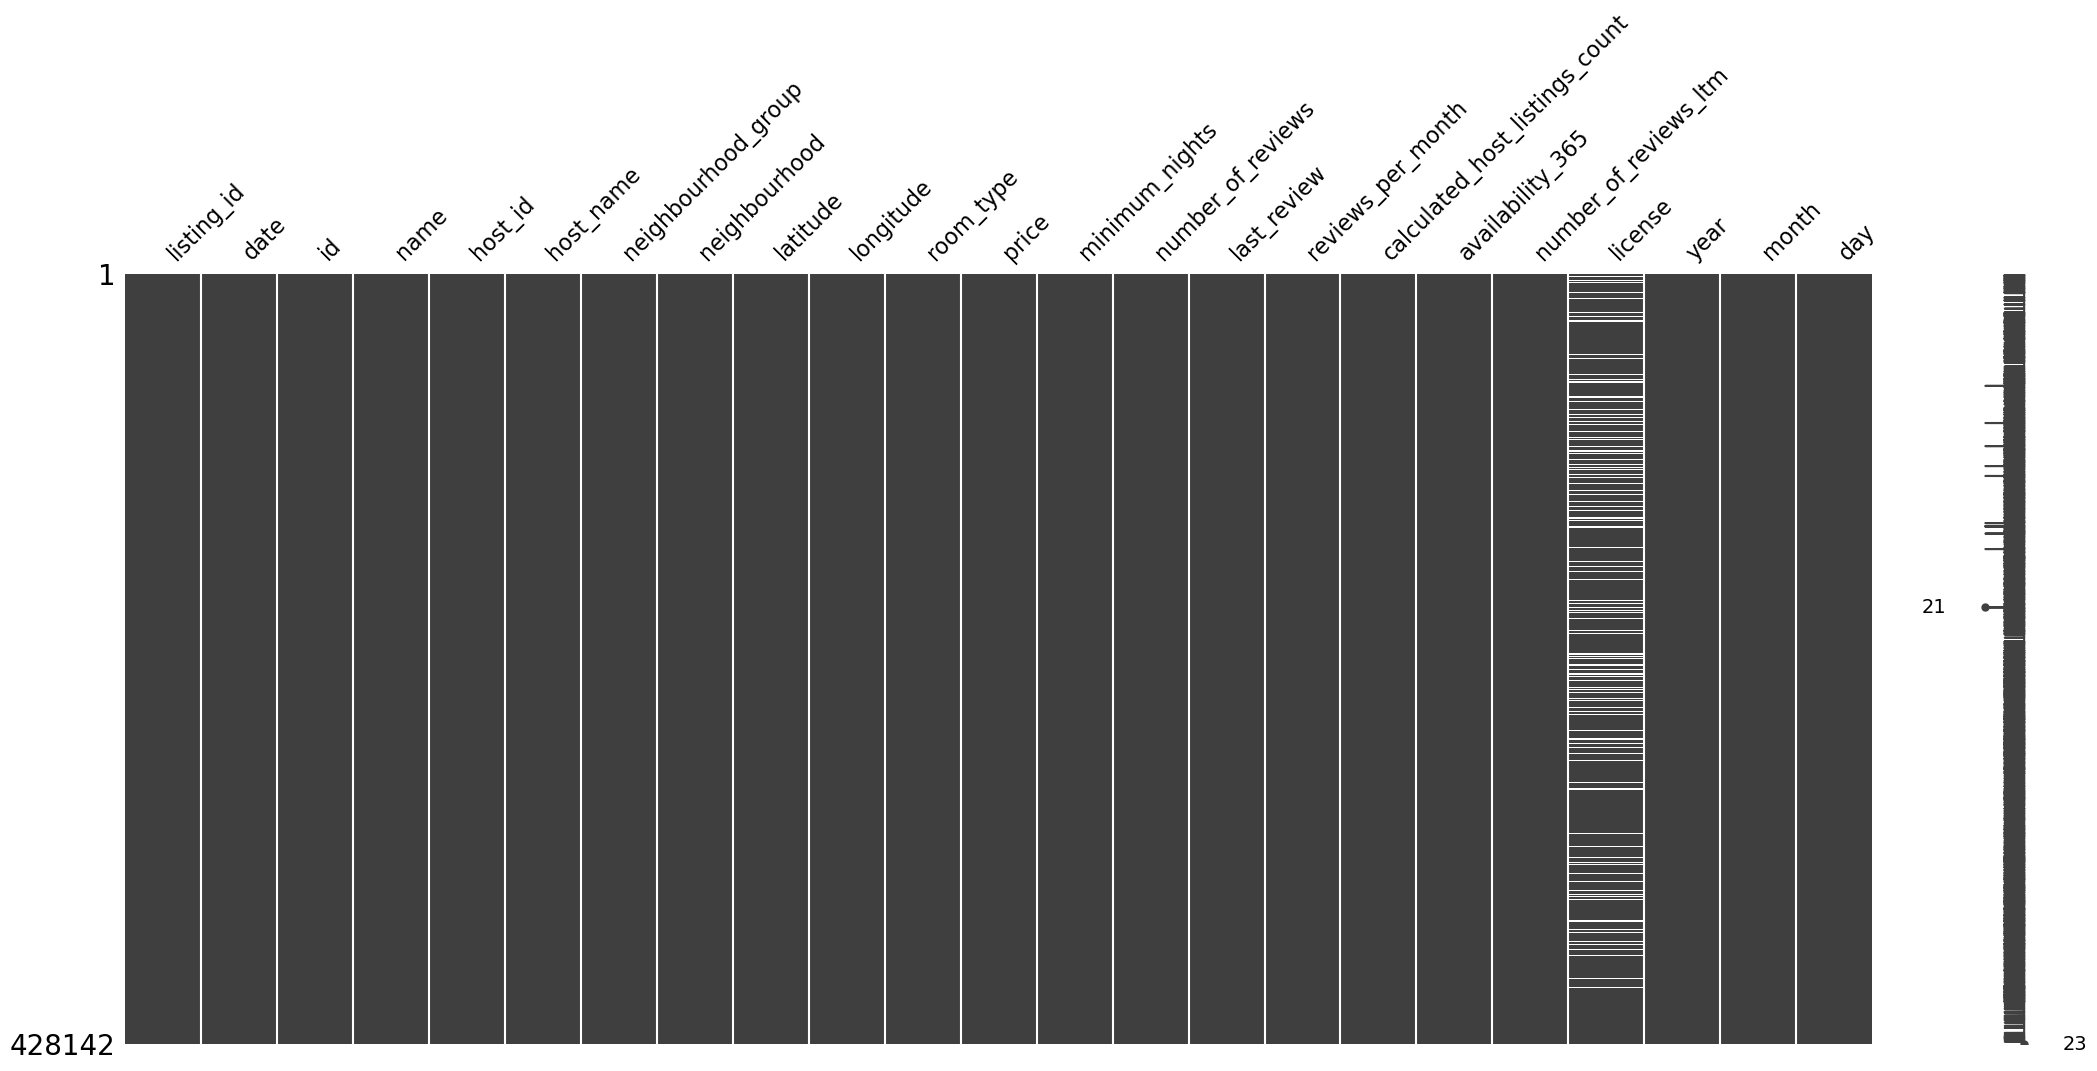

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(berlin)
plt.show()

# Yapılan Kiralamaların kaçı, hangi oda türünde yapılmış?

In [10]:
berlin_room_types = berlin["room_type"].value_counts()

In [11]:
berlin_room_types

Entire home/apt    301150
Private room       111978
Shared room          8128
Hotel room           6886
Name: room_type, dtype: int64

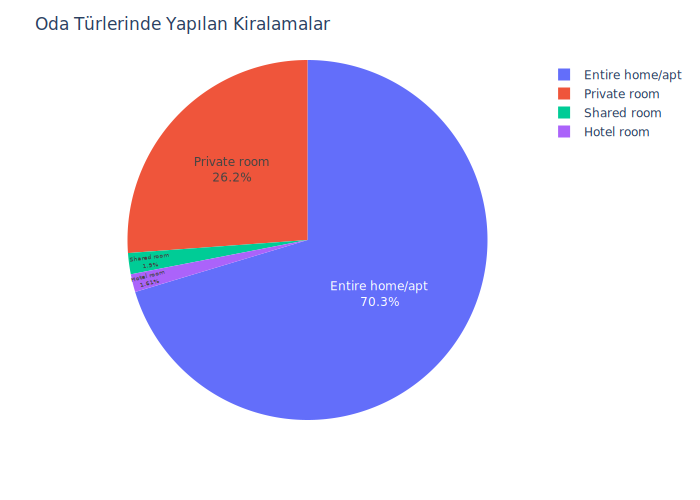

In [12]:
import plotly.express as px 

fig = px.pie(berlin_room_types, names = berlin_room_types.index, values = berlin_room_types.values)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title = "Oda Türlerinde Yapılan Kiralamalar")

fig.show()

# Yapılan kiralamaların kaçı, hangi semtte yapılmış? 

In [13]:
berlin_neighbourhood_group = berlin["neighbourhood_group"].value_counts()

In [14]:
berlin_neighbourhood_group

Mitte                       112443
Friedrichshain-Kreuzberg     99312
Pankow                       76092
Neukölln                     35487
Charlottenburg-Wilm.         34367
Tempelhof - Schöneberg       30722
Lichtenberg                  11034
Treptow - Köpenick            9921
Steglitz - Zehlendorf         6485
Reinickendorf                 6137
Marzahn - Hellersdorf         3417
Spandau                       2725
Name: neighbourhood_group, dtype: int64

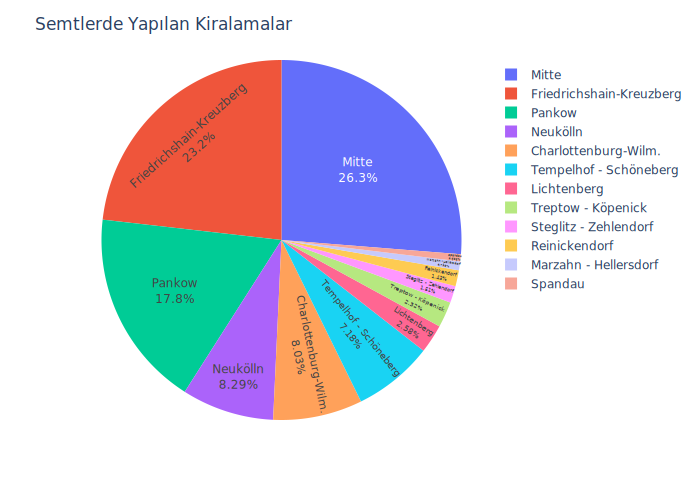

In [15]:
import plotly.express as px

fig = px.pie(berlin_neighbourhood_group, names=berlin_neighbourhood_group.index, values=berlin_neighbourhood_group.values)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title = "Semtlerde Yapılan Kiralamalar")

fig.show()

# Fiyat Ortalamasının Aylara Göre Değişimi

In [16]:
berlin_month = berlin[["month", "price"]].groupby("month").mean("price").reset_index()

In [17]:
berlin_month

,month,price
0,1,109.266649
1,2,111.833934
2,3,117.691909
3,4,116.889931
4,5,124.371815
5,6,124.089462
6,7,125.814887
7,8,120.805615
8,9,126.781447
9,10,125.635338


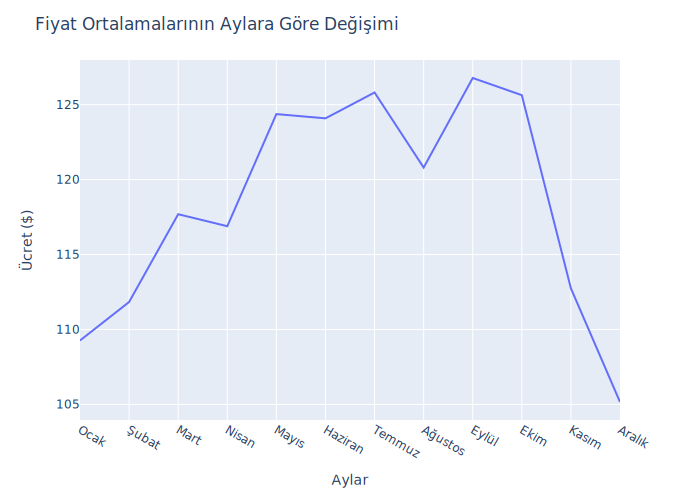

In [18]:
import plotly.express as px

fig = px.line(berlin_month, x = "month", y = "price")

fig.update_xaxes(ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
                tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)", title = "Fiyat Ortalamalarının Aylara Göre Değişimi")

fig.show()

# Oda Tiplerinin Fiyat Ortalamasının Aylara Göre Değişimi 

In [19]:
berlin_roomtype_month = berlin[["month", "room_type", "price"]].groupby(["room_type", "month"]).mean("price").reset_index()

In [20]:
berlin_roomtype_month

,room_type,month,price
0,Entire home/apt,1,126.278629
1,Entire home/apt,2,131.317825
2,Entire home/apt,3,140.031777
3,Entire home/apt,4,137.892892
4,Entire home/apt,5,150.582471
5,Entire home/apt,6,150.172833
6,Entire home/apt,7,148.060824
7,Entire home/apt,8,144.128609
8,Entire home/apt,9,156.477805
9,Entire home/apt,10,151.077622


### Entire home/apt oda türünün fiyat ortalamasının aylara göre değişimi

In [21]:
berlin_entirehome_month = berlin_roomtype_month[berlin_roomtype_month["room_type"] == "Entire home/apt"]

In [22]:
berlin_entirehome_month

,room_type,month,price
0,Entire home/apt,1,126.278629
1,Entire home/apt,2,131.317825
2,Entire home/apt,3,140.031777
3,Entire home/apt,4,137.892892
4,Entire home/apt,5,150.582471
5,Entire home/apt,6,150.172833
6,Entire home/apt,7,148.060824
7,Entire home/apt,8,144.128609
8,Entire home/apt,9,156.477805
9,Entire home/apt,10,151.077622


### Hotel room oda türünün fiyat ortalamasının aylara göre değişimi 

In [23]:
berlin_hotelroom_month = berlin_roomtype_month[berlin_roomtype_month["room_type"] == "Hotel room"]

In [24]:
berlin_hotelroom_month

,room_type,month,price
12,Hotel room,1,129.742321
13,Hotel room,2,138.817829
14,Hotel room,3,133.518433
15,Hotel room,4,137.827922
16,Hotel room,5,136.109792
17,Hotel room,6,144.948315
18,Hotel room,7,140.251918
19,Hotel room,8,135.589817
20,Hotel room,9,127.073418
21,Hotel room,10,127.477833


### Private room oda türünün fiyat ortalamasının aylara göre değişimi

In [25]:
berlin_privateroom_month = berlin_roomtype_month[berlin_roomtype_month["room_type"] == "Private room"]

In [26]:
berlin_privateroom_month

,room_type,month,price
24,Private room,1,60.833951
25,Private room,2,59.581449
26,Private room,3,58.392430
27,Private room,4,58.428299
28,Private room,5,58.176736
29,Private room,6,60.448881
30,Private room,7,69.836938
31,Private room,8,63.978177
32,Private room,9,61.053873
33,Private room,10,62.118346


### Shared room oda türünün fiyat ortalamasının aylara göre değişimi 

In [27]:
berlin_sharedroom_month = berlin_roomtype_month[berlin_roomtype_month["room_type"] == "Shared room"]

In [28]:
berlin_sharedroom_month

,room_type,month,price
36,Shared room,1,61.202156
37,Shared room,2,60.159701
38,Shared room,3,64.235294
39,Shared room,4,67.975000
40,Shared room,5,66.821643
41,Shared room,6,69.984934
42,Shared room,7,72.258320
43,Shared room,8,62.893362
44,Shared room,9,55.664720
45,Shared room,10,57.512821


### Bütün oda çeşitlerinin fiyat ortalamalarının aylara göre değişim grafiği

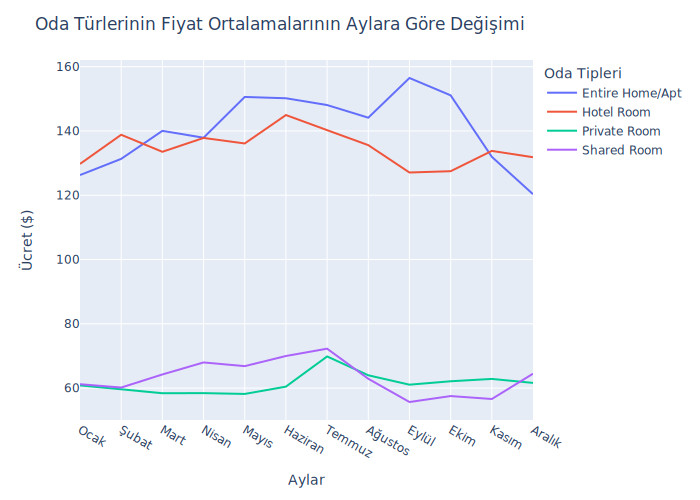

In [29]:
merge_roomtype = pd.concat([berlin_entirehome_month, berlin_hotelroom_month,
                           berlin_privateroom_month, berlin_sharedroom_month],
                          keys = ["Entire Home/Apt", "Hotel Room", "Private Room", "Shared Room"])

import plotly.express as px 
import pandas as pd

fig = px.line(merge_roomtype, x = "month", y = "price", color = merge_roomtype.index.get_level_values(0))
fig.update_layout(legend_title_text="Oda Tipleri", xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Oda Türlerinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)


fig.show()

# Semtlerin Fiyat Ortalamasının Aylara Göre Değişimi 

In [30]:
berlin["neighbourhood_group"].value_counts()

Mitte                       112443
Friedrichshain-Kreuzberg     99312
Pankow                       76092
Neukölln                     35487
Charlottenburg-Wilm.         34367
Tempelhof - Schöneberg       30722
Lichtenberg                  11034
Treptow - Köpenick            9921
Steglitz - Zehlendorf         6485
Reinickendorf                 6137
Marzahn - Hellersdorf         3417
Spandau                       2725
Name: neighbourhood_group, dtype: int64

In [31]:
berlin_neigh_group = berlin[["month", "neighbourhood_group", "price"]].groupby(["neighbourhood_group", "month"]).mean("price").reset_index()

In [32]:
berlin_neigh_group

,neighbourhood_group,month,price
0,Charlottenburg-Wilm.,1,87.052518
1,Charlottenburg-Wilm.,2,84.169162
2,Charlottenburg-Wilm.,3,83.625859
3,Charlottenburg-Wilm.,4,85.286319
4,Charlottenburg-Wilm.,5,86.455019
...,...,...,...
139,Treptow - Köpenick,8,79.783133
140,Treptow - Köpenick,9,73.928687
141,Treptow - Köpenick,10,74.890185
142,Treptow - Köpenick,11,67.925714


### Mitte semtinin fiyat ortalamalarının aylara göre değişimi

In [33]:
berlin_mitte = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Mitte"]

In [34]:
berlin_mitte

,neighbourhood_group,month,price
48,Mitte,1,138.846126
49,Mitte,2,149.943917
50,Mitte,3,175.091749
51,Mitte,4,167.015275
52,Mitte,5,203.662256
53,Mitte,6,199.821349
54,Mitte,7,188.811384
55,Mitte,8,178.365097
56,Mitte,9,212.338851
57,Mitte,10,197.811885


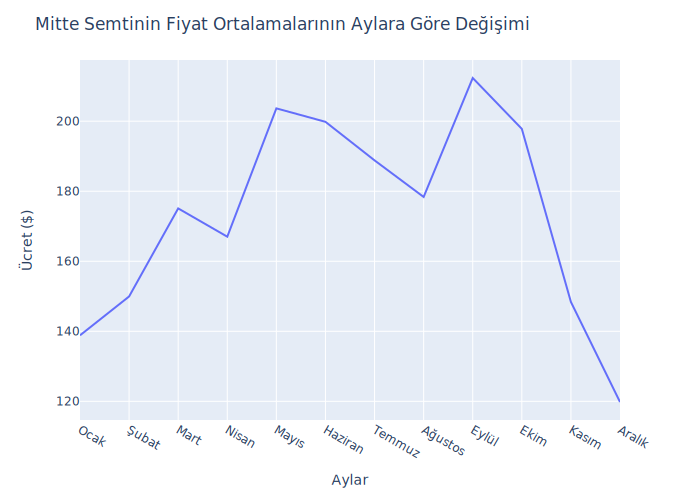

In [35]:
import plotly.express as px 
fig = px.line(berlin_mitte, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Mitte Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Friedrichshain-Kreuzberg semtinin fiyat ortalamalarının aylara göre değişimi

In [36]:
berlin_friedrichshain = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Friedrichshain-Kreuzberg"]

In [37]:
berlin_friedrichshain

,neighbourhood_group,month,price
12,Friedrichshain-Kreuzberg,1,101.763760
13,Friedrichshain-Kreuzberg,2,102.864628
14,Friedrichshain-Kreuzberg,3,102.202564
15,Friedrichshain-Kreuzberg,4,102.693331
16,Friedrichshain-Kreuzberg,5,101.435952
17,Friedrichshain-Kreuzberg,6,104.035804
18,Friedrichshain-Kreuzberg,7,106.409557
19,Friedrichshain-Kreuzberg,8,105.382124
20,Friedrichshain-Kreuzberg,9,103.615847
21,Friedrichshain-Kreuzberg,10,105.355619


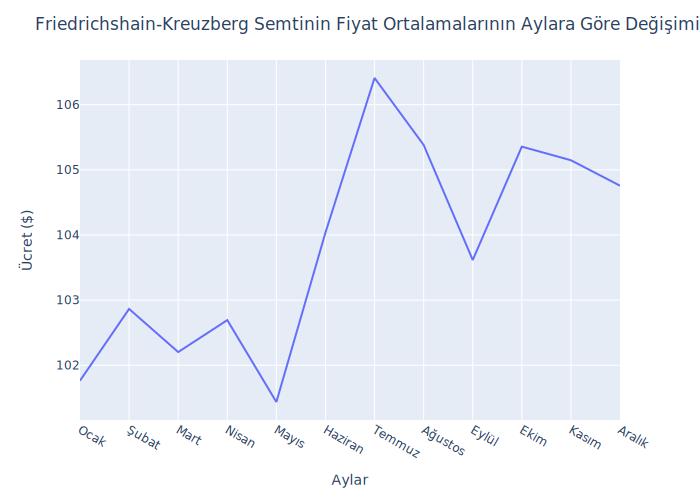

In [38]:
import plotly.express as px 
fig = px.line(berlin_friedrichshain, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Pankow semtinin fiyat ortalamalarının aylara göre değişimi

In [39]:
berlin_pankow = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Pankow"]

In [40]:
berlin_pankow

,neighbourhood_group,month,price
72,Pankow,1,112.736861
73,Pankow,2,113.080014
74,Pankow,3,111.205376
75,Pankow,4,112.034900
76,Pankow,5,108.650963
77,Pankow,6,112.731889
78,Pankow,7,114.660722
79,Pankow,8,113.573610
80,Pankow,9,111.210792
81,Pankow,10,115.045849


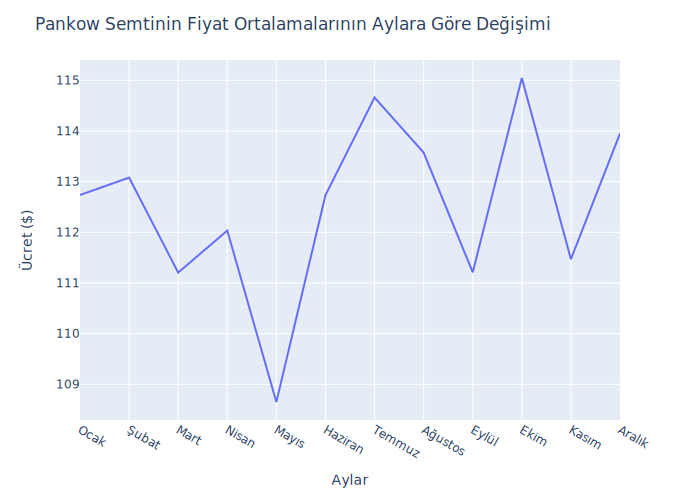

In [41]:
import plotly.express as px 
fig = px.line(berlin_pankow, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Pankow Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Neukölln semtinin fiyat ortalamalarının aylara göre değişimi

In [42]:
berlin_neukolln = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Neukölln"]

In [43]:
berlin_neukolln

,neighbourhood_group,month,price
60,Neukölln,1,89.040744
61,Neukölln,2,89.377893
62,Neukölln,3,90.645690
63,Neukölln,4,94.576597
64,Neukölln,5,91.109952
65,Neukölln,6,91.464261
66,Neukölln,7,93.199602
67,Neukölln,8,93.325869
68,Neukölln,9,90.861776
69,Neukölln,10,95.648942


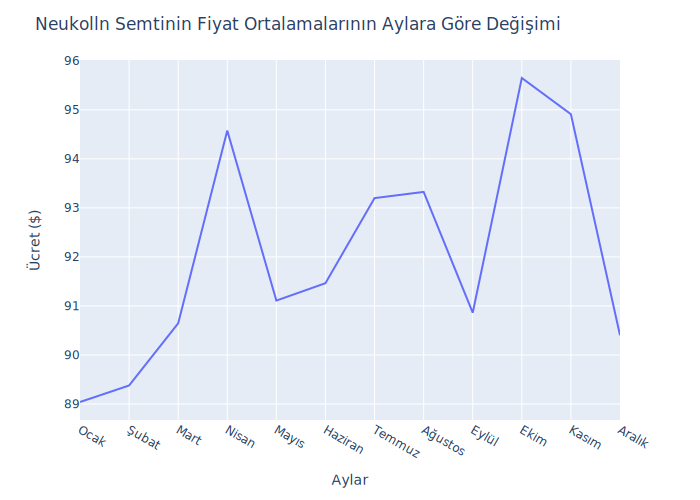

In [44]:
import plotly.express as px 
fig = px.line(berlin_neukolln, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Neukolln Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Charlottenburg-Wilm. semtinin fiyat ortalamalarının aylara göre değişimi

In [45]:
berlin_charlottenburg = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Charlottenburg-Wilm."]

In [46]:
berlin_charlottenburg

,neighbourhood_group,month,price
0,Charlottenburg-Wilm.,1,87.052518
1,Charlottenburg-Wilm.,2,84.169162
2,Charlottenburg-Wilm.,3,83.625859
3,Charlottenburg-Wilm.,4,85.286319
4,Charlottenburg-Wilm.,5,86.455019
5,Charlottenburg-Wilm.,6,86.736116
6,Charlottenburg-Wilm.,7,90.136670
7,Charlottenburg-Wilm.,8,88.601827
8,Charlottenburg-Wilm.,9,85.774729
9,Charlottenburg-Wilm.,10,87.956098


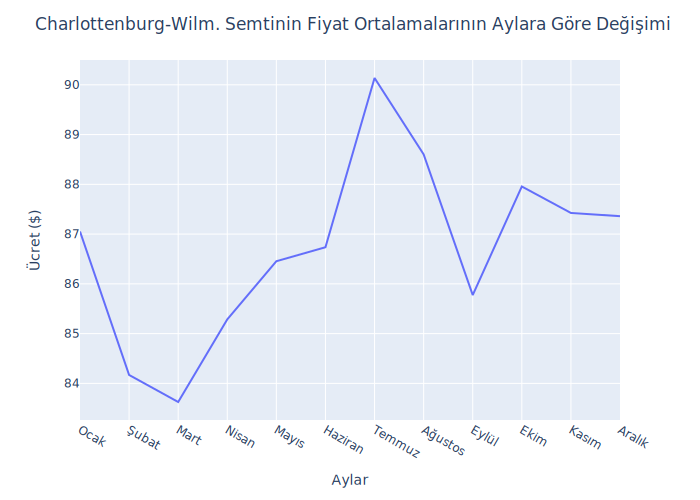

In [47]:
import plotly.express as px 
fig = px.line(berlin_charlottenburg, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Charlottenburg-Wilm. Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Tempelhof - Schöneberg semtinin fiyat ortalamalarının aylara göre değişimi

In [48]:
berlin_tepmelhof = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Tempelhof - Schöneberg"] 

In [49]:
berlin_tepmelhof

,neighbourhood_group,month,price
120,Tempelhof - Schöneberg,1,98.743386
121,Tempelhof - Schöneberg,2,98.746874
122,Tempelhof - Schöneberg,3,97.576762
123,Tempelhof - Schöneberg,4,102.481928
124,Tempelhof - Schöneberg,5,103.619883
125,Tempelhof - Schöneberg,6,99.791418
126,Tempelhof - Schöneberg,7,106.730873
127,Tempelhof - Schöneberg,8,102.386845
128,Tempelhof - Schöneberg,9,101.968301
129,Tempelhof - Schöneberg,10,101.494631


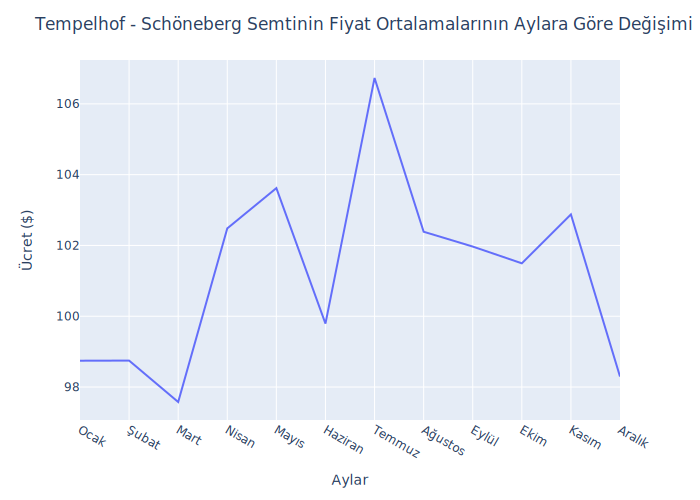

In [50]:
import plotly.express as px 
fig = px.line(berlin_tepmelhof, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Tempelhof - Schöneberg Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Lichtenberg semtinin fiyat ortalamalarının aylara göre değişimi

In [51]:
berlin_lichtenberg = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Lichtenberg"]

In [52]:
berlin_lichtenberg

,neighbourhood_group,month,price
24,Lichtenberg,1,84.031746
25,Lichtenberg,2,77.015544
26,Lichtenberg,3,77.541193
27,Lichtenberg,4,83.468019
28,Lichtenberg,5,80.268530
29,Lichtenberg,6,82.953222
30,Lichtenberg,7,86.448776
31,Lichtenberg,8,85.671987
32,Lichtenberg,9,81.831698
33,Lichtenberg,10,81.302423


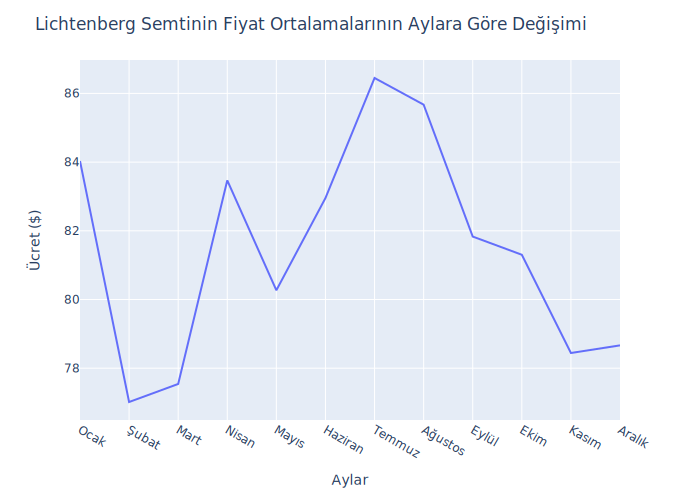

In [53]:
import plotly.express as px 
fig = px.line(berlin_lichtenberg, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Lichtenberg Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Treptow - Köpenick semtinin fiyat ortalamalarının aylara göre değişimi

In [54]:
berlin_treptow = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Treptow - Köpenick"]

In [55]:
berlin_treptow

,neighbourhood_group,month,price
132,Treptow - Köpenick,1,69.909667
133,Treptow - Köpenick,2,69.702564
134,Treptow - Köpenick,3,72.006791
135,Treptow - Köpenick,4,74.235832
136,Treptow - Köpenick,5,71.896325
137,Treptow - Köpenick,6,74.093448
138,Treptow - Köpenick,7,80.059087
139,Treptow - Köpenick,8,79.783133
140,Treptow - Köpenick,9,73.928687
141,Treptow - Köpenick,10,74.890185


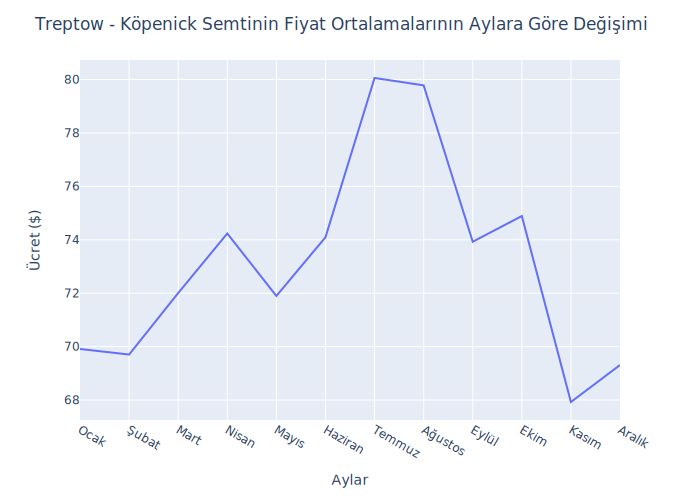

In [56]:
import plotly.express as px 
fig = px.line(berlin_treptow, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Treptow - Köpenick Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Steglitz - Zehlendorf semtinin fiyat ortalamalarının aylara göre değişimi

In [57]:
berlin_steglitz = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Steglitz - Zehlendorf"]

In [58]:
berlin_steglitz

,neighbourhood_group,month,price
108,Steglitz - Zehlendorf,1,85.121005
109,Steglitz - Zehlendorf,2,76.020101
110,Steglitz - Zehlendorf,3,78.172632
111,Steglitz - Zehlendorf,4,83.210667
112,Steglitz - Zehlendorf,5,84.739606
113,Steglitz - Zehlendorf,6,82.112116
114,Steglitz - Zehlendorf,7,90.065705
115,Steglitz - Zehlendorf,8,83.433333
116,Steglitz - Zehlendorf,9,78.563679
117,Steglitz - Zehlendorf,10,81.368644


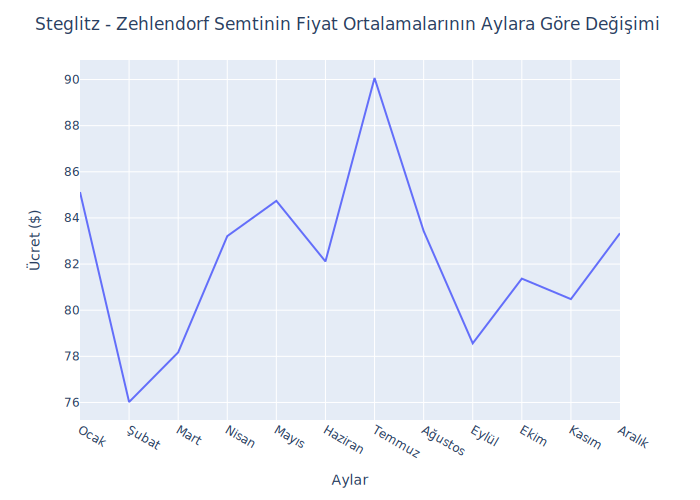

In [59]:
import plotly.express as px 
fig = px.line(berlin_steglitz, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Steglitz - Zehlendorf Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Reinickendorf semtinin fiyat ortalamalarının aylara göre değişimi

In [60]:
berlin_reinickendorf = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Reinickendorf"]

In [61]:
berlin_reinickendorf

,neighbourhood_group,month,price
84,Reinickendorf,1,59.180380
85,Reinickendorf,2,57.959459
86,Reinickendorf,3,56.310924
87,Reinickendorf,4,56.565217
88,Reinickendorf,5,56.913440
89,Reinickendorf,6,60.354839
90,Reinickendorf,7,62.369099
91,Reinickendorf,8,64.603329
92,Reinickendorf,9,59.634638
93,Reinickendorf,10,59.497151


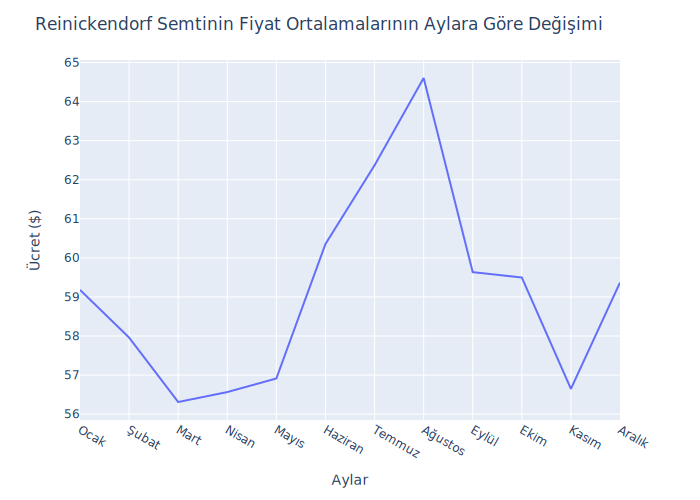

In [62]:
import plotly.express as px 
fig = px.line(berlin_reinickendorf, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Reinickendorf Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Marzahn - Hellersdorf semtinin fiyat ortalamalarının aylara göre değişimi

In [63]:
berlin_marzahn = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Marzahn - Hellersdorf"]

In [64]:
berlin_marzahn

,neighbourhood_group,month,price
36,Marzahn - Hellersdorf,1,67.321053
37,Marzahn - Hellersdorf,2,64.728395
38,Marzahn - Hellersdorf,3,66.816327
39,Marzahn - Hellersdorf,4,81.698565
40,Marzahn - Hellersdorf,5,71.596296
41,Marzahn - Hellersdorf,6,73.358491
42,Marzahn - Hellersdorf,7,276.639303
43,Marzahn - Hellersdorf,8,92.364835
44,Marzahn - Hellersdorf,9,66.907801
45,Marzahn - Hellersdorf,10,62.926346


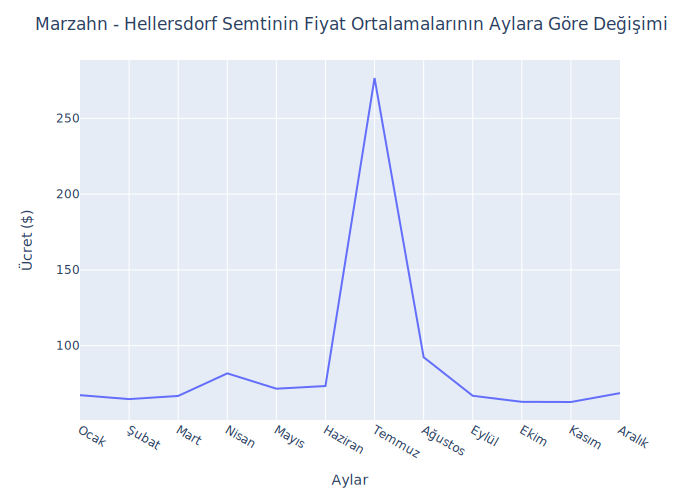

In [65]:
import plotly.express as px 
fig = px.line(berlin_marzahn, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Marzahn - Hellersdorf Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

### Spandau semtinin fiyat ortalamalarının aylara göre değişimi

In [66]:
berlin_spandau = berlin_neigh_group[berlin_neigh_group["neighbourhood_group"] == "Spandau"]

In [67]:
berlin_spandau

,neighbourhood_group,month,price
96,Spandau,1,70.175532
97,Spandau,2,60.797814
98,Spandau,3,68.057325
99,Spandau,4,80.616883
100,Spandau,5,72.640884
101,Spandau,6,73.708475
102,Spandau,7,77.897516
103,Spandau,8,71.993789
104,Spandau,9,74.302181
105,Spandau,10,75.926199


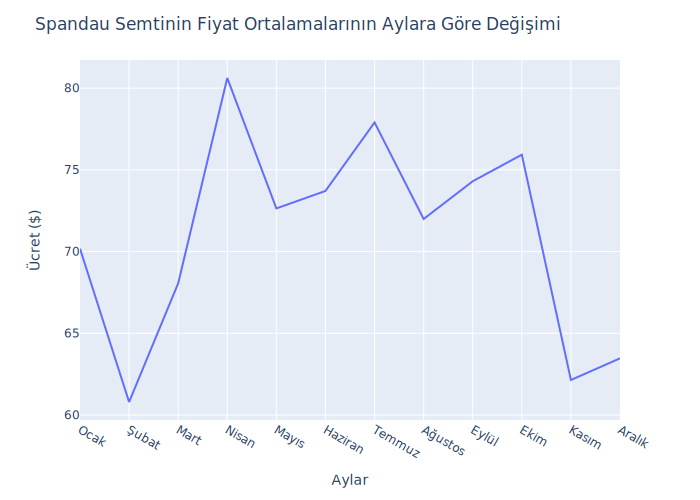

In [68]:
import plotly.express as px 
fig = px.line(berlin_spandau, x = "month", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Spandau Semtinin Fiyat Ortalamalarının Aylara Göre Değişimi")
fig.update_xaxes(
    ticktext=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

fig.show()

# Fiyat Ortalamasının Yıllara Göre Değişimi

In [69]:
berlin_year = berlin[["year", "price"]].groupby("year").mean("price").reset_index()

In [70]:
berlin_year

,year,price
0,2009,83.000000
1,2010,74.978723
2,2011,104.092050
3,2012,156.502950
4,2013,122.725667
5,2014,96.737470
6,2015,136.197766
7,2016,100.010188
8,2017,125.173795
9,2018,123.781533


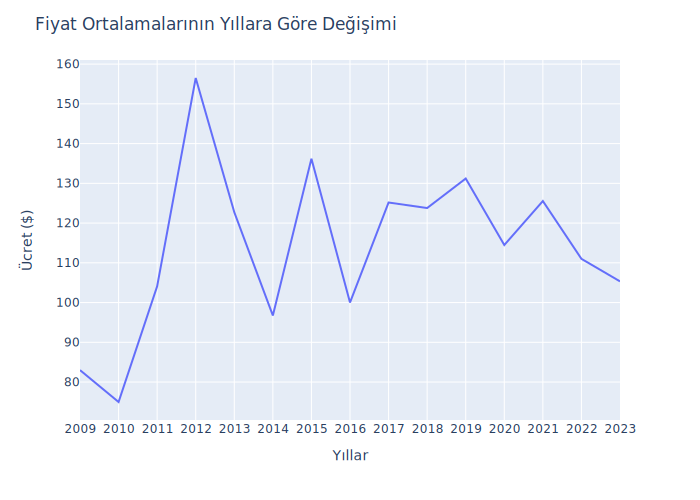

In [71]:
import plotly.express as px

fig = px.line(berlin_year, x="year", y="price")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

# Oda Tiplerinin Fiyat Ortalamasının Yıllara Göre Değişimi 

In [72]:
berlin_roomtype_year = berlin[["year", "room_type", "price"]].groupby(["room_type", "year"]).mean("price").reset_index()

In [73]:
berlin_roomtype_year

,room_type,year,price
0,Entire home/apt,2009,83.000000
1,Entire home/apt,2010,97.730769
2,Entire home/apt,2011,127.060606
3,Entire home/apt,2012,203.121925
4,Entire home/apt,2013,145.551439
5,Entire home/apt,2014,108.893505
6,Entire home/apt,2015,165.057464
7,Entire home/apt,2016,119.646200
8,Entire home/apt,2017,156.008007
9,Entire home/apt,2018,154.163127


### Entire home/apt oda türünün fiyat ortalamasının yıllara göre değişimi

In [74]:
berlin_entirehome_year = berlin_roomtype_year[berlin_roomtype_year["room_type"] == "Entire home/apt"]

In [75]:
berlin_entirehome_year

,room_type,year,price
0,Entire home/apt,2009,83.000000
1,Entire home/apt,2010,97.730769
2,Entire home/apt,2011,127.060606
3,Entire home/apt,2012,203.121925
4,Entire home/apt,2013,145.551439
5,Entire home/apt,2014,108.893505
6,Entire home/apt,2015,165.057464
7,Entire home/apt,2016,119.646200
8,Entire home/apt,2017,156.008007
9,Entire home/apt,2018,154.163127


### Hotel room oda türünün fiyat ortalamasının yıllara göre değişimi

In [76]:
berlin_hotelroom_year = berlin_roomtype_year[berlin_roomtype_year["room_type"] == "Hotel room"]

In [77]:
berlin_hotelroom_year

,room_type,year,price
15,Hotel room,2017,140.000000
16,Hotel room,2018,151.517241
17,Hotel room,2019,135.768250
18,Hotel room,2020,134.612807
19,Hotel room,2021,134.904027
20,Hotel room,2022,131.633397
21,Hotel room,2023,133.758950


### Private room oda türünün fiyat ortalamasının yıllara göre değişimi

In [78]:
berlin_private_year = berlin_roomtype_year[berlin_roomtype_year["room_type"] == "Private room"]

In [79]:
berlin_private_year

,room_type,year,price
22,Private room,2010,46.809524
23,Private room,2011,52.878378
24,Private room,2012,52.966746
25,Private room,2013,58.791209
26,Private room,2014,52.128773
27,Private room,2015,51.749023
28,Private room,2016,51.293155
29,Private room,2017,49.883067
30,Private room,2018,50.469188
31,Private room,2019,55.188875


### Shared room oda türünün fiyat ortalamasının yıllara göre değişimi

In [80]:
berlin_shared_year = berlin_roomtype_year[berlin_roomtype_year["room_type"] == "Shared room"]

In [81]:
berlin_shared_year

,room_type,year,price
36,Shared room,2014,84.425000
37,Shared room,2015,81.935223
38,Shared room,2016,88.785321
39,Shared room,2017,95.457086
40,Shared room,2018,97.479769
41,Shared room,2019,60.740284
42,Shared room,2020,57.904313
43,Shared room,2021,46.401797
44,Shared room,2022,46.679625
45,Shared room,2023,39.500000


### Oda türlerinin fiyat ortalamalarının yıllara göre değişim grafiği:

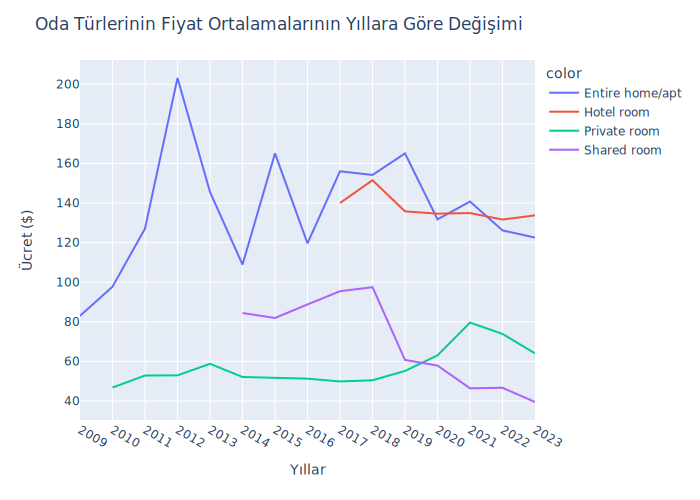

In [82]:
import plotly.express as px 
import numpy as np

berlin_merge_year = pd.concat([berlin_entirehome_year, berlin_hotelroom_year,
                              berlin_private_year, berlin_shared_year],
                             keys = ["Entire home/apt", "Hotel room", 
                             "Private room", "Shared room"])

fig = px.line(berlin_merge_year, x = "year", y = "price", color = berlin_merge_year.index.get_level_values(0))
fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Oda Türlerinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

# Semtlerin Fiyat Ortalamalarının Yıllara Göre Değişimi

In [83]:
berlin_neigh_group_year = berlin[["year", "neighbourhood_group", "price"]].groupby(["neighbourhood_group", "year"]).mean("price").reset_index()

In [84]:
berlin_neigh_group_year

,neighbourhood_group,year,price
0,Charlottenburg-Wilm.,2011,111.000000
1,Charlottenburg-Wilm.,2012,88.687500
2,Charlottenburg-Wilm.,2013,88.095808
3,Charlottenburg-Wilm.,2014,90.644068
4,Charlottenburg-Wilm.,2015,78.521164
...,...,...,...
149,Treptow - Köpenick,2019,73.429952
150,Treptow - Köpenick,2020,77.247059
151,Treptow - Köpenick,2021,80.666156
152,Treptow - Köpenick,2022,79.190583


### Mitte semtinin fiyat ortalamalarının yıllara göre değişimi

In [85]:
berlin_mitte_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Mitte"]

In [86]:
berlin_mitte_year

,neighbourhood_group,year,price
50,Mitte,2010,149.000000
51,Mitte,2011,81.538462
52,Mitte,2012,392.158076
53,Mitte,2013,242.493651
54,Mitte,2014,101.725397
55,Mitte,2015,252.327560
56,Mitte,2016,120.781487
57,Mitte,2017,205.664745
58,Mitte,2018,203.431361
59,Mitte,2019,233.702085


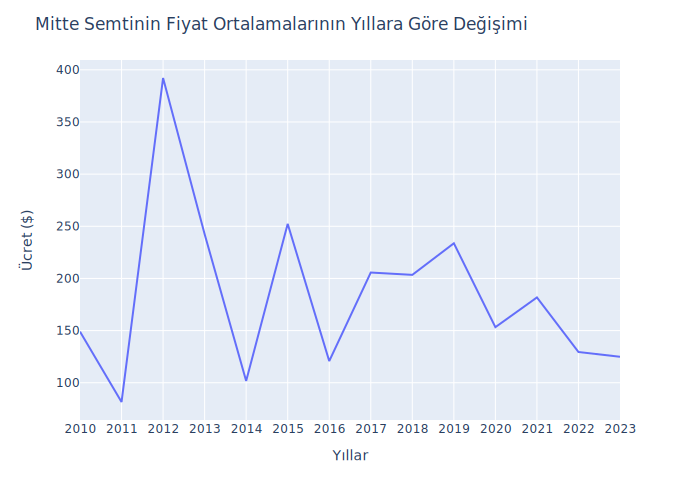

In [87]:
import plotly.express as px 
fig = px.line(berlin_mitte_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Mitte Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Mitte Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Friedrichshain-Kreuzberg semtinin fiyat ortalamalarının yıllara göre değişimi

In [88]:
berlin_friedrichshain_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Friedrichshain-Kreuzberg"]

In [89]:
berlin_friedrichshain_year

,neighbourhood_group,year,price
13,Friedrichshain-Kreuzberg,2010,63.785714
14,Friedrichshain-Kreuzberg,2011,112.203125
15,Friedrichshain-Kreuzberg,2012,78.819620
16,Friedrichshain-Kreuzberg,2013,103.157186
17,Friedrichshain-Kreuzberg,2014,105.695593
18,Friedrichshain-Kreuzberg,2015,102.569226
19,Friedrichshain-Kreuzberg,2016,95.227196
20,Friedrichshain-Kreuzberg,2017,92.136115
21,Friedrichshain-Kreuzberg,2018,98.148065
22,Friedrichshain-Kreuzberg,2019,102.837545


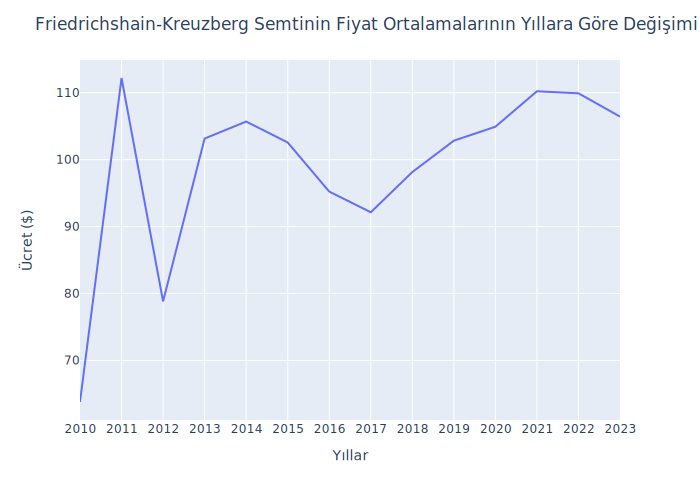

In [90]:
import plotly.express as px 
fig = px.line(berlin_friedrichshain_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Pankow semtinin fiyat ortalamalarının yıllara göre değişimi

In [91]:
berlin_pankow_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Pankow"]

In [92]:
berlin_pankow_year

,neighbourhood_group,year,price
78,Pankow,2009,83.000000
79,Pankow,2010,98.300000
80,Pankow,2011,112.347826
81,Pankow,2012,111.159389
82,Pankow,2013,98.339500
83,Pankow,2014,101.093011
84,Pankow,2015,99.951427
85,Pankow,2016,100.454969
86,Pankow,2017,101.184061
87,Pankow,2018,105.402546


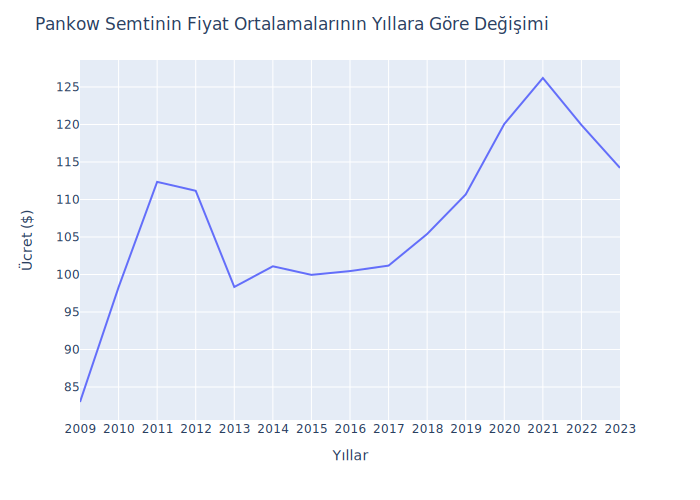

In [93]:
import plotly.express as px 
fig = px.line(berlin_pankow_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Pankow Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Neukölln semtinin fiyat ortalamalarının yıllara göre değişimi

In [94]:
berlin_neukolln_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Neukölln"]

In [95]:
berlin_neukolln_year

,neighbourhood_group,year,price
64,Neukölln,2010,25.000000
65,Neukölln,2011,54.333333
66,Neukölln,2012,67.800000
67,Neukölln,2013,58.652174
68,Neukölln,2014,64.360778
69,Neukölln,2015,67.755293
70,Neukölln,2016,82.563269
71,Neukölln,2017,98.971558
72,Neukölln,2018,96.258912
73,Neukölln,2019,91.864357


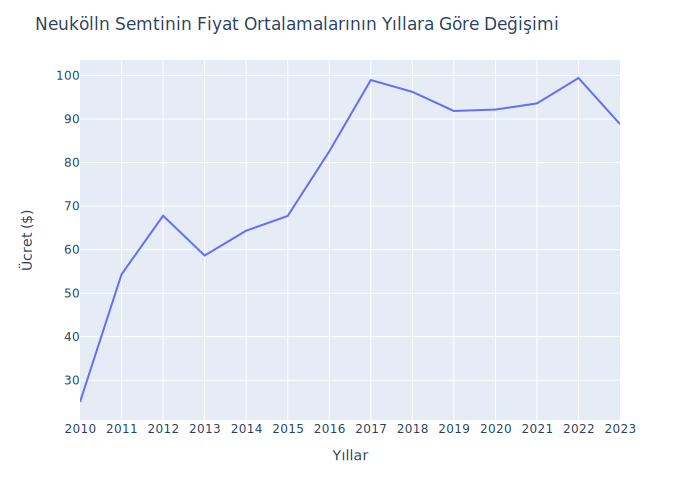

In [96]:
import plotly.express as px 
fig = px.line(berlin_neukolln_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Neukölln Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Neukölln Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Charlottenburg-Wilm. semtinin fiyat ortalamalarının yıllara göre değişimi

In [97]:
berlin_charlottenburg_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Charlottenburg-Wilm."]

In [98]:
berlin_charlottenburg_year

,neighbourhood_group,year,price
0,Charlottenburg-Wilm.,2011,111.000000
1,Charlottenburg-Wilm.,2012,88.687500
2,Charlottenburg-Wilm.,2013,88.095808
3,Charlottenburg-Wilm.,2014,90.644068
4,Charlottenburg-Wilm.,2015,78.521164
5,Charlottenburg-Wilm.,2016,76.668591
6,Charlottenburg-Wilm.,2017,80.189626
7,Charlottenburg-Wilm.,2018,91.510308
8,Charlottenburg-Wilm.,2019,86.405396
9,Charlottenburg-Wilm.,2020,85.326836


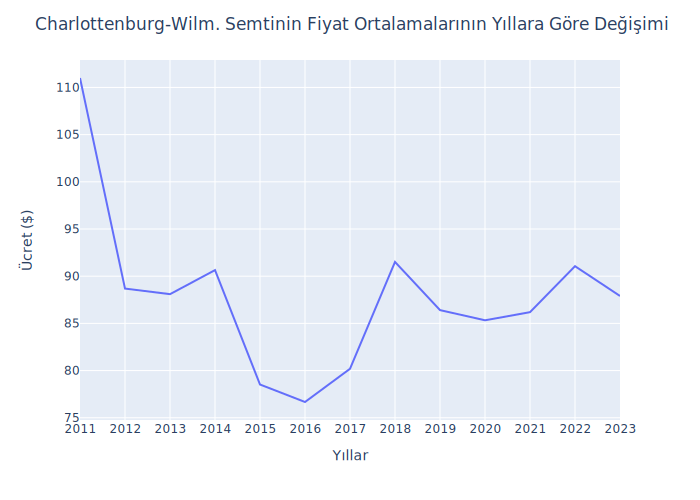

In [99]:
import plotly.express as px 
fig = px.line(berlin_charlottenburg_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Charlottenburg-Wilm. Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Tempelhof - Schöneberg semtinin fiyat ortalamalarının yıllara göre değişimi

In [100]:
berlin_tempelhof_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Tempelhof - Schöneberg"]

In [101]:
berlin_tempelhof_year

,neighbourhood_group,year,price
128,Tempelhof - Schöneberg,2010,49.000000
129,Tempelhof - Schöneberg,2011,88.600000
130,Tempelhof - Schöneberg,2012,86.534483
131,Tempelhof - Schöneberg,2013,91.980769
132,Tempelhof - Schöneberg,2014,96.269912
133,Tempelhof - Schöneberg,2015,117.037433
134,Tempelhof - Schöneberg,2016,113.358146
135,Tempelhof - Schöneberg,2017,109.900047
136,Tempelhof - Schöneberg,2018,97.411799
137,Tempelhof - Schöneberg,2019,98.190449


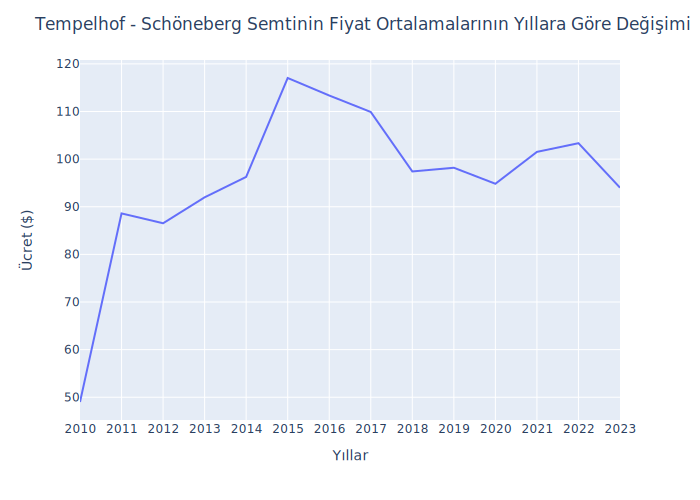

In [102]:
import plotly.express as px 
fig = px.line(berlin_tempelhof_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Tempelhof - Schöneberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Lichtenberg semtinin fiyat ortalamalarının yıllara göre değişimi

In [103]:
berlin_lechtenberg_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Lichtenberg"]

In [104]:
berlin_lechtenberg_year

,neighbourhood_group,year,price
27,Lichtenberg,2012,70.000000
28,Lichtenberg,2013,102.666667
29,Lichtenberg,2014,64.400000
30,Lichtenberg,2015,79.173077
31,Lichtenberg,2016,102.812977
32,Lichtenberg,2017,97.814121
33,Lichtenberg,2018,89.988086
34,Lichtenberg,2019,78.762734
35,Lichtenberg,2020,79.100999
36,Lichtenberg,2021,82.394061


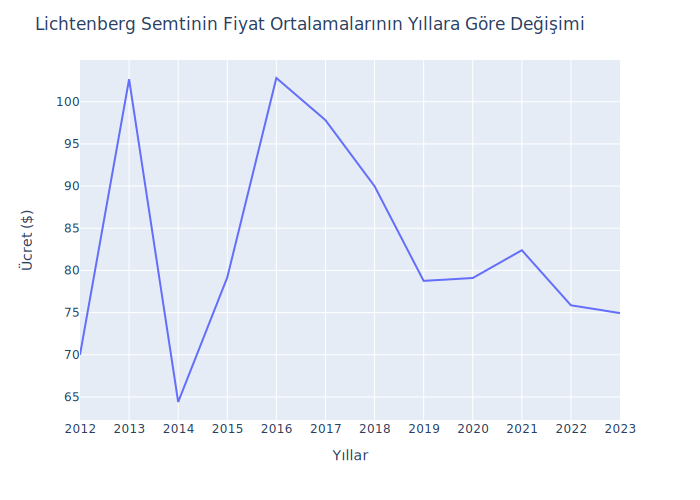

In [105]:
import plotly.express as px 
fig = px.line(berlin_lechtenberg_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Lichtenberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Treptow - Köpenick semtinin fiyat ortalamalarının yıllara göre değişimi

In [106]:
berlin_treptow_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Treptow - Köpenick"]

In [107]:
berlin_treptow_year

,neighbourhood_group,year,price
142,Treptow - Köpenick,2012,46.000000
143,Treptow - Köpenick,2013,46.000000
144,Treptow - Köpenick,2014,55.318182
145,Treptow - Köpenick,2015,62.982301
146,Treptow - Köpenick,2016,59.923387
147,Treptow - Köpenick,2017,65.222656
148,Treptow - Köpenick,2018,66.712264
149,Treptow - Köpenick,2019,73.429952
150,Treptow - Köpenick,2020,77.247059
151,Treptow - Köpenick,2021,80.666156


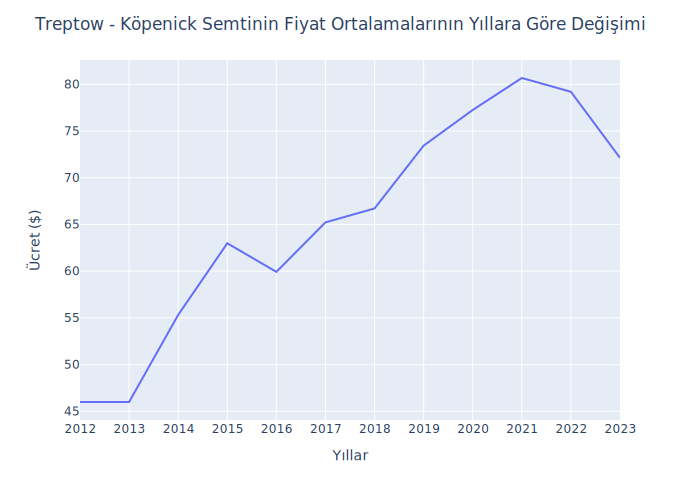

In [108]:
import plotly.express as px 
fig = px.line(berlin_treptow_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Treptow - Köpenick Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Steglitz - Zehlendorf semtinin fiyat ortalamalarının yıllara göre değişimi

In [109]:
berlin_steglitz_year = berlin_neigh_group_year.iloc[116:128 :]
#NOT!
#berlin_neigh_group_year[berlin_neigh_group_year['neighbourhood_group'] == 'Steglitz - Zehlendorf'] yazınca boş dataframe dönüyor
#bu yüzden iloc ile atama yaptım

In [110]:
berlin_steglitz_year

,neighbourhood_group,year,price
116,Steglitz - Zehlendorf,2012,176.666667
117,Steglitz - Zehlendorf,2013,179.666667
118,Steglitz - Zehlendorf,2014,108.557692
119,Steglitz - Zehlendorf,2015,88.065990
120,Steglitz - Zehlendorf,2016,86.681388
121,Steglitz - Zehlendorf,2017,87.656687
122,Steglitz - Zehlendorf,2018,72.483333
123,Steglitz - Zehlendorf,2019,76.796748
124,Steglitz - Zehlendorf,2020,87.681818
125,Steglitz - Zehlendorf,2021,86.067797


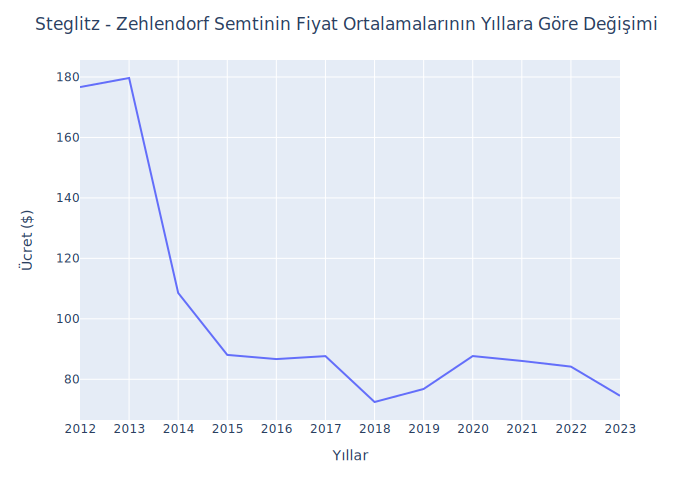

In [111]:
import plotly.express as px 
fig = px.line(berlin_steglitz_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Steglitz - Zehlendorf Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Reinickendorf semtinin fiyat ortalamalarının yıllara göre değişimi

In [112]:
berlin_reinickendorf_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Reinickendorf"]

In [113]:
berlin_reinickendorf_year

,neighbourhood_group,year,price
93,Reinickendorf,2013,49.000000
94,Reinickendorf,2014,61.685185
95,Reinickendorf,2015,55.535354
96,Reinickendorf,2016,56.236607
97,Reinickendorf,2017,60.163311
98,Reinickendorf,2018,54.743820
99,Reinickendorf,2019,55.219355
100,Reinickendorf,2020,68.417311
101,Reinickendorf,2021,64.543563
102,Reinickendorf,2022,61.739442


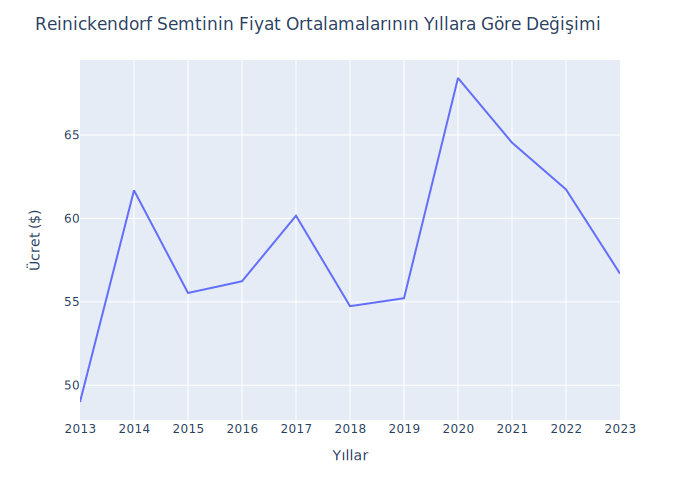

In [114]:
import plotly.express as px 
fig = px.line(berlin_reinickendorf_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Reinickendorf Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Marzahn - Hellersdorf semtinin fiyat ortalamalarının yıllara göre değişimi

In [115]:
berlin_marzahn_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Marzahn - Hellersdorf"]

In [116]:
berlin_marzahn_year

,neighbourhood_group,year,price
39,Marzahn - Hellersdorf,2013,95.000000
40,Marzahn - Hellersdorf,2014,64.882353
41,Marzahn - Hellersdorf,2015,64.538462
42,Marzahn - Hellersdorf,2016,68.967213
43,Marzahn - Hellersdorf,2017,76.931677
44,Marzahn - Hellersdorf,2018,64.005629
45,Marzahn - Hellersdorf,2019,65.170213
46,Marzahn - Hellersdorf,2020,73.807143
47,Marzahn - Hellersdorf,2021,150.516043
48,Marzahn - Hellersdorf,2022,150.383764


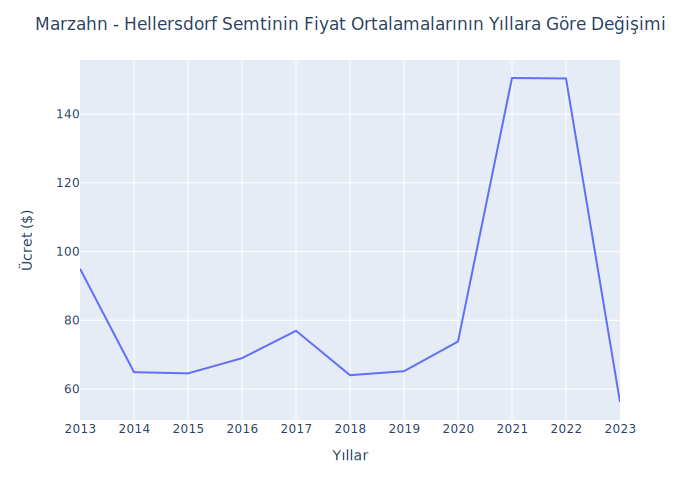

In [117]:
import plotly.express as px 
fig = px.line(berlin_marzahn_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Marzahn - Hellersdorf Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()

### Spandau semtinin fiyat ortalamalarının yıllara göre değişimi

In [118]:
berlin_spandau_year = berlin_neigh_group_year[berlin_neigh_group_year["neighbourhood_group"] == "Spandau"]

In [119]:
berlin_spandau_year

,neighbourhood_group,year,price
104,Spandau,2012,40.000000
105,Spandau,2013,40.000000
106,Spandau,2014,45.000000
107,Spandau,2015,52.888889
108,Spandau,2016,48.000000
109,Spandau,2017,78.072072
110,Spandau,2018,63.160183
111,Spandau,2019,61.339858
112,Spandau,2020,70.839721
113,Spandau,2021,81.427807


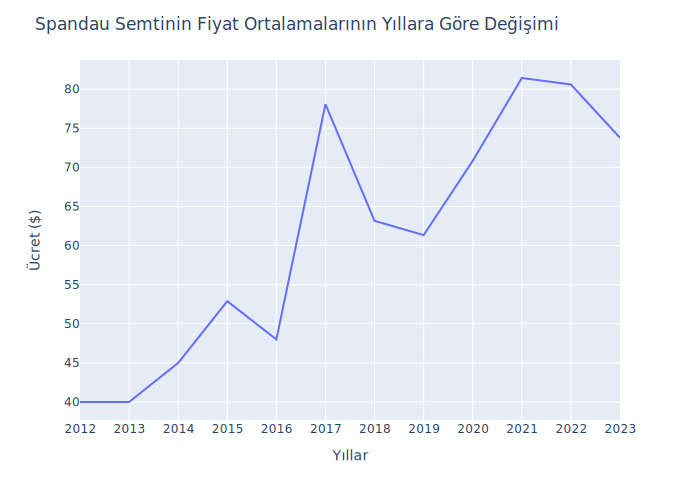

In [120]:
import plotly.express as px 
fig = px.line(berlin_spandau_year, x = "year", y = "price")
fig.update_layout(xaxis_title = "Aylar", yaxis_title = "Ücret ($)",
                 title = "Friedrichshain-Kreuzberg Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi")

fig.update_layout(
    xaxis_title="Yıllar",
    yaxis_title="Ücret ($)",
    title="Spandau Semtinin Fiyat Ortalamalarının Yıllara Göre Değişimi",
    xaxis=dict(
        tickmode='linear',
        tick0=min(berlin_year['year']),
        dtick=1
    )
)

fig.show()